# Section 0: Understanding Data

In [975]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [5]:
#Deep Learning
!pip install tensorflow
!pip install keras 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from keras.optimizers import SGD
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=82583f7a0f7c28e07fe190fb15f777ba95efc328a7fa81f7b05f4b1b20a8c2ce
  Stored in directory: c:\users\ruiji\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


# Section 0.1: Data Description
We import data as a pandas dataframe

In [1091]:
df = pd.read_csv("bike_sharing_dataset.csv")
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


Summary: This dataset doesn't include any nan values. The count of new bike shares has large standard deviation, which means there is a lot of variance in the observed data. We notice that cnt, t1, t2, hum, and wind_speed are numerical values. However, 
weather_code, is_holiday (binary), is_weekend (binary), and season are categorical data.

In [1092]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


# Section 0.2: Cleaning Dataset
Since 'season' column was denoted as (0-spring ; 1-summer; 2-fall; 3-winter), we should transform them to binary data, and we used pd.get_dummies() function to set dummy variables for season. We also set dummy variables for weather_code. 

In [1093]:
#dummy variable
data = pd.get_dummies(df, columns = ['season'])
data = pd.get_dummies(data, columns = ['weather_code'])
data

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,0,1,0,0,1,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0


First of all, we didn't realize the importance of hourly data, so we droped hourly data and just kept date. However, we found the performace of the data is not good enough. Then, we grouped the 'cnt' by hours and sorted the means. Finally, we set different hours as 'busy', 'day', and 'night' categories.

In [1094]:
hour = pd.to_datetime(data['timestamp']).dt.hour.values
data['hour'] = hour
data

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,season_3.0,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,0,1,0,0,1,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,0,1,1,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,22


In [1095]:
data.groupby('hour')['cnt'].mean().sort_values()

hour
4       73.313454
3       94.245492
5      110.707351
2      136.303745
1      200.631215
0      290.609116
23     439.652355
6      466.626722
22     592.409655
21     741.249311
20    1059.781293
10    1064.660690
11    1151.218707
12    1433.717421
7     1468.745179
14    1472.004121
13    1505.739011
15    1564.621399
19    1651.510316
9     1653.019257
16    1869.801370
18    2629.043956
17    2829.585165
8     2882.823204
Name: cnt, dtype: float64

busy hours: mean > 2000; day: 2000 > mean > 1000; night: mean < 1000. Drop 'hour' column.

In [1096]:
data['busy'] = [1 if x in [8, 17, 18] else 0 for x in hour]
data['night'] = [1 if x in [0, 1, 2, 3, 4, 5, 6, 21, 22, 23] else 0 for x in hour]
data['day'] = [1 if x in [7, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20] else 0 for x in hour]
data = data.drop(columns=['hour'])
data

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,...,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,busy,night,day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,0.0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,0.0,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0


We want to know the correlation between each variable. Since we have to predict the count of new bike shares, we focus on the first column. We find that 'cnt' is more correlated to variables, such as real temperature in Celsiust (t1), "feels like" temperature in Celsius (t2), humidity in percentage (hum), busy, night, and day.

<AxesSubplot:>

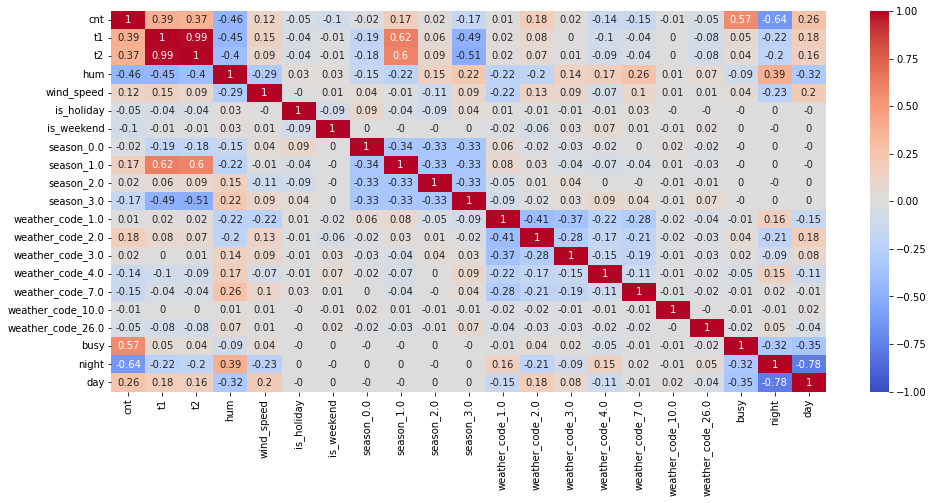

In [1097]:
plt.figure(figsize = (16,7))
sns.heatmap(data.corr("pearson").round(2), cmap = 'coolwarm', annot = True, vmin=-1, vmax=1)

# Cross-validation Preparation
We transform 'timestamp' to 'date', which can be easier for us to find the index of 2016-09-30. Data records between 2015-01-
04 and 2016-09-30 are the training set. Data records between 2016-10-01 and 2017-01-03 are the test set.

In [1098]:
#train/test split
data['timestamp'] = pd.to_datetime(data['timestamp'],format='%Y-%m-%d')
training = data.loc[(data['timestamp'] >= '2015-01-04') & (data['timestamp'] <= '2016-09-30')]
test = data.loc[(data['timestamp'] >= '2016-10-01') & (data['timestamp'] <= '2017-01-03')]
training

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,...,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,busy,night,day
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15108,2016-09-29 20:00:00,1333,16.0,16.0,57.0,22.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1
15109,2016-09-29 21:00:00,1037,15.0,15.0,65.5,22.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
15110,2016-09-29 22:00:00,773,14.5,14.5,65.0,21.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
15111,2016-09-29 23:00:00,572,14.0,14.0,69.5,19.0,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0


Separate data to predictors (Xs) and target (Y) in training set and the test set. Find lengths of the training set and the test set.

In [172]:
#X/Y Split
trainingData = training.dropna()
trainingData = trainingData.iloc[:,1:].to_numpy()
xTrain = trainingData[:,1:]
yTrain = trainingData[:,0]
testData = test.dropna()
testData = testData.iloc[:,1:].to_numpy()
xTest = testData[:,1:]
yTest = testData[:,0]
print(len(xTrain))
print(len(xTest))

15113
2255


In [317]:
#PCA
# zscored = stats.zscore(xTrain)
# pca = PCA().fit(zscored)
# eigVals = pca.explained_variance_
# loadings = pca.components_*-1
# rotatedData = pca.fit_transform(zscored)*-1
# print(eigVals)
# n = 8
# plt.bar(np.linspace(1,n,n),eigVals)
# plt.xlabel("Principal Components")
# plt.ylabel("Eigenvalues")
# plt.show()

# threshold = 1
# kaiser = np.count_nonzero(eigVals > threshold)
# print(kaiser)

# for i in range(kaiser):
#     plt.subplot(2, 2, i+1)
#     plt.bar(np.linspace(1,n,n),loadings[i,:])
#     plt.xlabel('Predictors')
#     plt.ylabel('Loading')
# plt.show()

# Section 1: Processing Data

# Section 1.1 Normalize Data
In this part, we used two ways to normalize the data. The first way is normalizing the whole dataset. The second way is only normalize target because we don't want to lose information in predictors. In addition, we don't need 'timestamp' column for prediction, so we have to drop it at the beginning.

1. We utilize MinMaxScaler to normalize data and make them between 0 and 1. For categorical data, they are binary data, so they will remain the same. Base on the previous result, we know that the length of the training set is 15113, and we will use this number as index to separate the normalized data array to training and test sets.

In [1108]:
#Normalize the whole dataset.
Data = data.drop(columns=['timestamp'])
scaler_Data = MinMaxScaler().fit(Data.values)
Data_scaled = scaler_Data.transform(Data.values)

target = Data_scaled[:,0].reshape(-1,1)
Data_scaled = Data_scaled[:,1:]
xTrain = Data_scaled[:15113, :]
yTrain = target[:15113,:]
xTest = Data_scaled[15113:,:]
yTest = target[15113:,:]

In [981]:
Data

,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season_0.0,season_1.0,season_2.0,...,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,weather_code_7.0,weather_code_10.0,weather_code_26.0,busy,night,day
0,182,3.0,2.0,93.0,6.0,0.0,1.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,138,3.0,2.5,93.0,5.0,0.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,134,2.5,2.5,96.5,0.0,0.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,72,2.0,2.0,100.0,0.0,0.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,47,2.0,0.0,93.0,6.5,0.0,1.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
17410,541,5.0,1.0,81.0,21.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
17411,337,5.5,1.5,78.5,24.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
17412,224,5.5,1.5,76.0,23.0,0.0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


2. The second method is only normalizing 'cnt' column (target), keep predictors as the original data. Other steps are same as previous procedures.

In [1099]:
#Normalize the cnt.
Data = data.drop(columns=['timestamp'])
predictors = Data.to_numpy()
predictors = predictors[:,1:]
target = MinMaxScaler().fit_transform(Data.iloc[:,0].values.reshape(-1,1))

xTrain = predictors[:15113, :]
yTrain = target[:15113,:]
xTest = predictors[15113:, :]
yTest = target[15113:,:]

# Section 2: Model Training and Testing

We use six different models to predict the count of new bike shares (cnt). Since 'cnt' is numerical values, we have to use regression models. In this part, we use linear regression, lasso regression, decision tree regressor, random forest regressor, neural networks, and NeuralProphet to predict 'cnt', and then we will compare root mean squared error (RMSE) and mean absolute error (MAE) to evaluate the models performance and select the most suitable one for this task. 

# Section 2.1: Multiple Linear Regression
We just fit the data to the most simple model, linear regression, by using LinearRegression() function. 

In [978]:
#Multiple Linear Regression (Season Split)
def linear_regression(x_train, y_train, x_test, y_test):
    model1 = LinearRegression().fit(x_train,y_train)
    beta0 = model1.intercept_
    beta1 = model1.coef_
    prediction = model1.predict(x_test)
    corr1 = np.corrcoef(prediction,y_test)[0,1]
    mse = mean_squared_error(y_test,prediction)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,prediction)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    
    plt.plot(yTest,prediction,'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()


Model based on data without focusing on hours in each day.

C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


MAE: 0.08152107643831674
MSE: 0.014851818107801644
RMSE: 0.12186803562789401


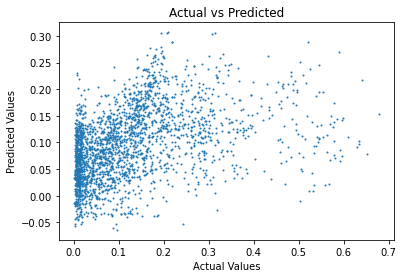

In [985]:
linear_regression(xTrain, yTrain, xTest, yTest)

Model focusing on hours in each day and normalize the 'cnt'

C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


MAE: 0.05645993915079857
MSE: 0.006352596352126542
RMSE: 0.07970317654978716


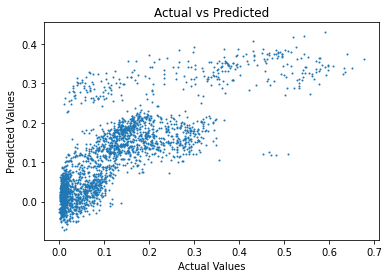

In [1100]:
linear_regression(xTrain, yTrain, xTest, yTest)

Model focusing on hours in each day and normalizing the whole dataset.

C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ruiji\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


MAE: 0.056571012093710564
MSE: 0.006366224463373711
RMSE: 0.0797886236463176


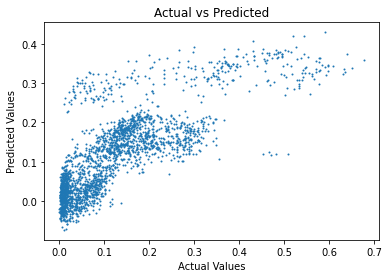

In [1110]:
linear_regression(xTrain, yTrain, xTest, yTest)

2. Lasso

In [1204]:
#Lasso
def lasso(a, x_train, y_train, x_test, y_test):
    mse = []
    mae = []
    pred = []
    for i in a:
        model2 = Lasso(alpha=i).fit(x_train,y_train)
        prediction = model2.predict(x_test)
        pred.append(prediction)
        mse.append(mean_squared_error(y_test,prediction))
        mae.append(mean_absolute_error(y_test,prediction))
    rmse = (np.sqrt(mse))
    best_mae = np.min(mae)
    best_mse = np.min(mse)
    best_rmse = np.min(rmse)
    index = np.where(rmse == best_rmse)[0][0]
    
    print(f"MAE: {best_mae.round(5)}")
    print(f"MSE: {best_mse.round(5)}")
    print(f"RMSE: {best_rmse.round(5)}")  
    plt.figure(figsize=(17, 10))
    plt.subplot(2,2,1)
    plt.plot(a, rmse, label = a)
    plt.xlabel('Parameters')
    plt.ylabel('RMSE')
    plt.xticks(a)
    plt.title('RMSE of Parameters')
    plt.subplot(2,2,2)
    plt.plot(a, mae, label = a)
    plt.xlabel('Parameters')
    plt.ylabel('MAE')
    plt.title('MAE of Parameters')
    plt.xticks(a)
    plt.subplot(2,2,3)
    plt.plot(y_test,pred[index],'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()
    


Model based on data without focusing on hours in each day.

MAE: 0.0808524727365288
MSE: 0.014136232181916638
RMSE: 0.11889588799414653


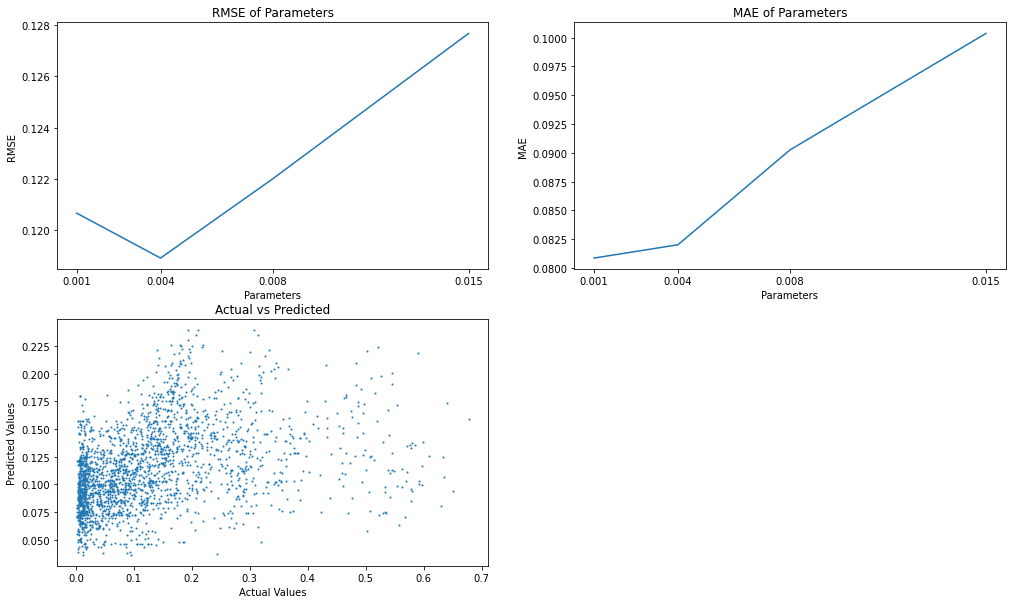

In [1065]:
lasso([0.001, 0.004, 0.008, 0.015], xTrain, yTrain, xTest, yTest)

Model focusing on hours in each day and normalize the 'cnt'

MAE: 0.05585343920573094
MSE: 0.006385249667130263
RMSE: 0.07990775724002185


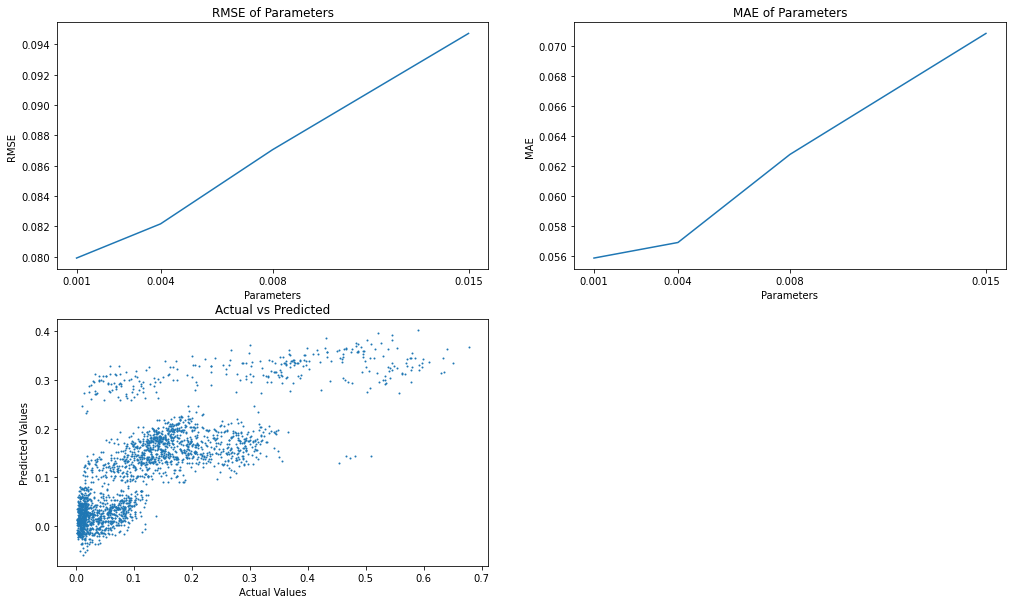

In [1201]:
lasso([0.001, 0.004, 0.008, 0.015], xTrain, yTrain, xTest, yTest)

MAE: 0.05585
MSE: 0.00639
RMSE: 0.07991


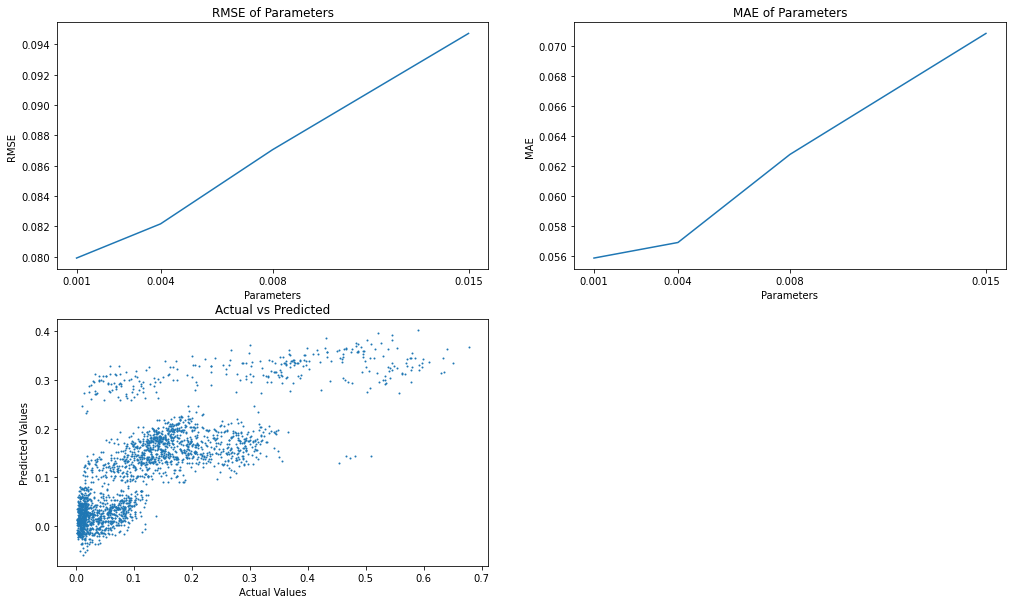

In [1205]:
lasso([0.001, 0.004, 0.008, 0.015], xTrain, yTrain, xTest, yTest)

3. Decision Tree

In [1072]:
#Decision Tree
def decision_tree(depths, x_train, y_train, x_test, y_test):
    mse = []
    mae = []
    pred = []
    for i in depths:
        model4 = DecisionTreeRegressor(max_depth=i)
        model4.fit(x_train,y_train)
        prediction = model4.predict(x_test)
        pred.append(prediction)
        mse.append(mean_squared_error(y_test,prediction))
        mae.append(mean_absolute_error(y_test,prediction))
    rmse = (np.sqrt(mse))
    best_mae = np.min(mae)
    best_mse = np.min(mse)
    best_rmse = np.min(rmse)
    index = np.where(rmse == best_rmse)[0][0]

    print(f"MAE: {best_mae}")
    print(f"MSE: {best_mse}")
    print(f"RMSE: {best_rmse}")  
    plt.figure(figsize=(17, 10))
    plt.subplot(2,2,1)
    plt.plot(depths, rmse, label = depths)
    plt.xlabel('Parameters')
    plt.ylabel('RMSE')
    plt.xticks(depths)
    plt.title('RMSE of Parameters')
    plt.subplot(2,2,2)
    plt.plot(depths, mae, label = depths)
    plt.xlabel('Parameters')
    plt.ylabel('MAE')
    plt.title('MAE of Parameters')
    plt.xticks(depths)
    plt.subplot(2,2,3)
    plt.plot(y_test,pred[index],'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()



Model based on data without focusing on hours in each day.

MAE: 0.08087647576564601
MSE: 0.014496776756593544
RMSE: 0.12040256125429202


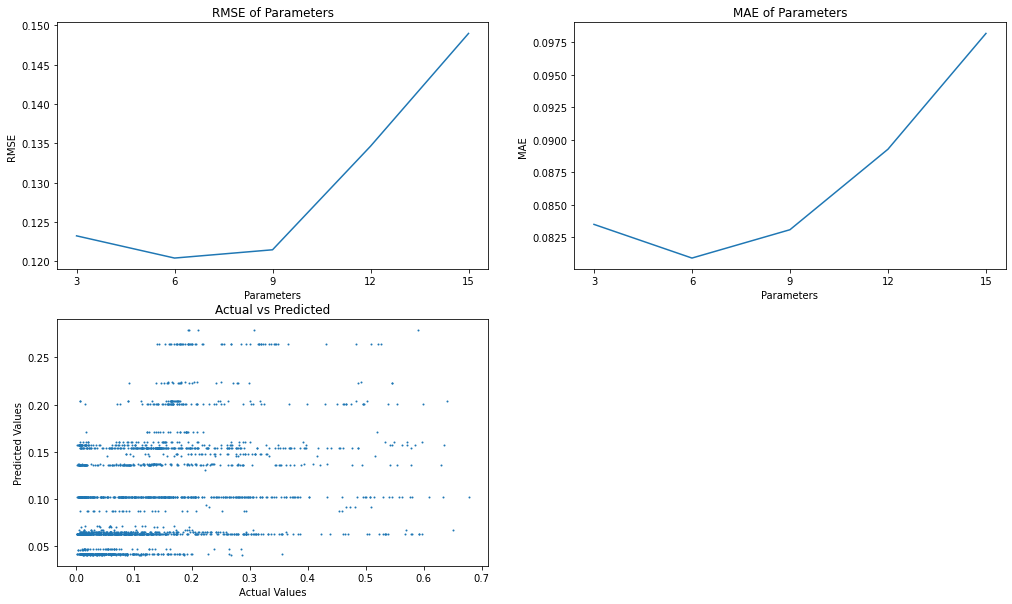

In [1073]:
decision_tree([3,6,9,12,15], xTrain, yTrain, xTest, yTest) 

Model focusing on hours in each day and normalize the 'cnt'

MAE: 0.04464103456551816
MSE: 0.004053624914330225
RMSE: 0.06366808395365943


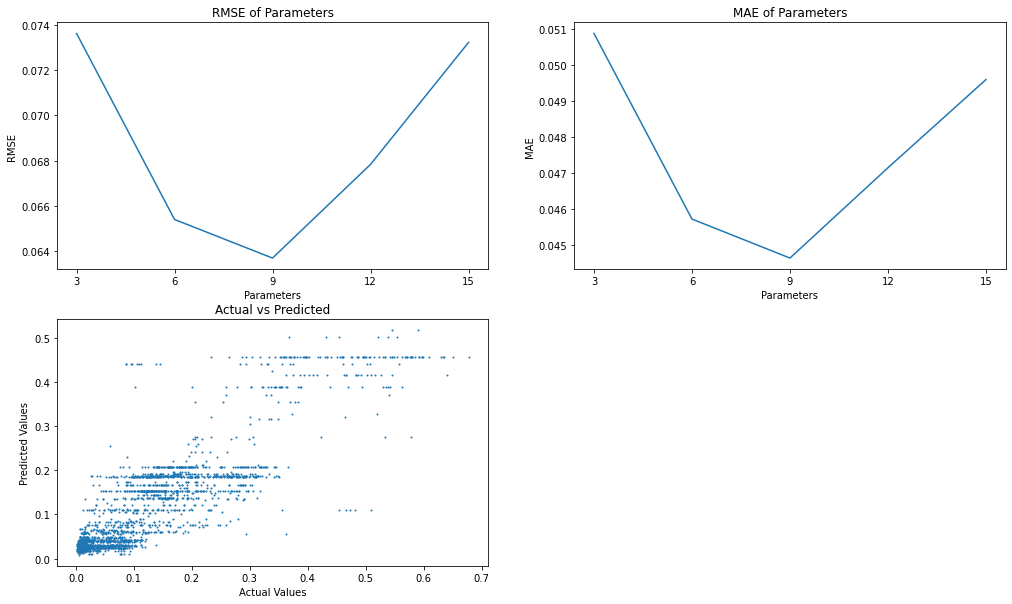

In [1104]:
decision_tree([3,6,9,12,15], xTrain, yTrain, xTest, yTest) 

MAE: 0.04464103456551816
MSE: 0.004053624914330225
RMSE: 0.06366808395365943


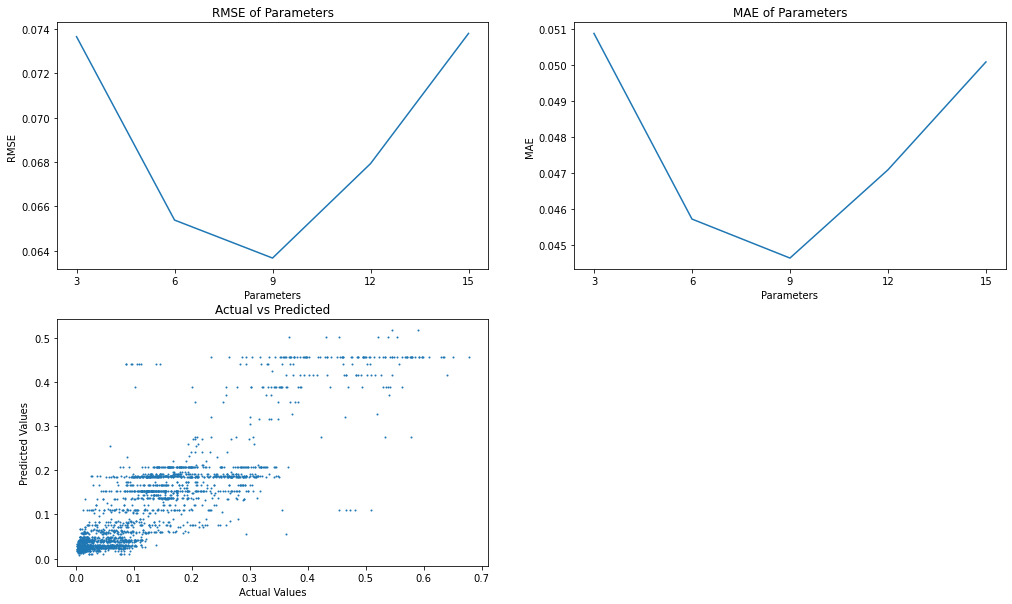

In [1112]:
decision_tree([3,6,9,12,15], xTrain, yTrain, xTest, yTest) 

4. Random Forest

In [257]:
from sklearn.ensemble import RandomForestRegressor

In [1081]:
#Random Forest
def random_forest(depths, x_train, y_train, x_test, y_test):
    mse = []
    mae = []
    pred = []
    for i in depths:
        model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
        model_random_forest.fit(x_train,y_train)
        prediction = model_random_forest.predict(x_test)
        pred.append(prediction)
        mse.append(mean_squared_error(y_test,prediction))
        mae.append(mean_absolute_error(y_test,prediction))
    rmse = (np.sqrt(mse))
    best_mae = np.min(mae)
    best_mse = np.min(mse)
    best_rmse = np.min(rmse)
    index = np.where(rmse == best_rmse)[0][0]

    print(f"MAE: {best_mae}")
    print(f"MSE: {best_mse}")
    print(f"RMSE: {best_rmse}")  
    plt.figure(figsize=(17, 10))
    plt.subplot(2,2,1)
    plt.plot(depths, rmse, label = depths)
    plt.xlabel('Parameters')
    plt.ylabel('RMSE')
    plt.xticks(depths)
    plt.title('RMSE of Parameters')
    plt.subplot(2,2,2)
    plt.plot(depths, mae, label = depths)
    plt.xlabel('Parameters')
    plt.ylabel('MAE')
    plt.title('MAE of Parameters')
    plt.xticks(depths)
    plt.subplot(2,2,3)
    plt.plot(y_test,pred[index],'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()
    


Model based on data without focusing on hours in each day.

C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a

MAE: 0.08454471615817856
MSE: 0.015096186847204348
RMSE: 0.12286654079611889


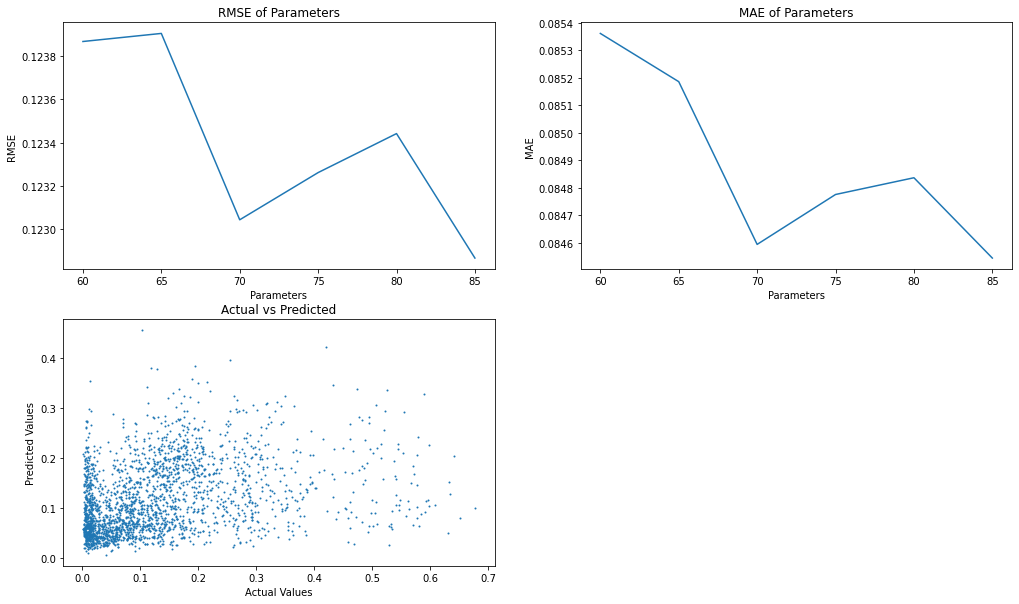

In [1082]:
random_forest([60,65,70,75,80,85], xTrain, yTrain, xTest, yTest) 

Model focusing on hours in each day and normalize the 'cnt'

C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a

MAE: 0.0436477486691831
MSE: 0.0039804820216990805
RMSE: 0.06309106134547968


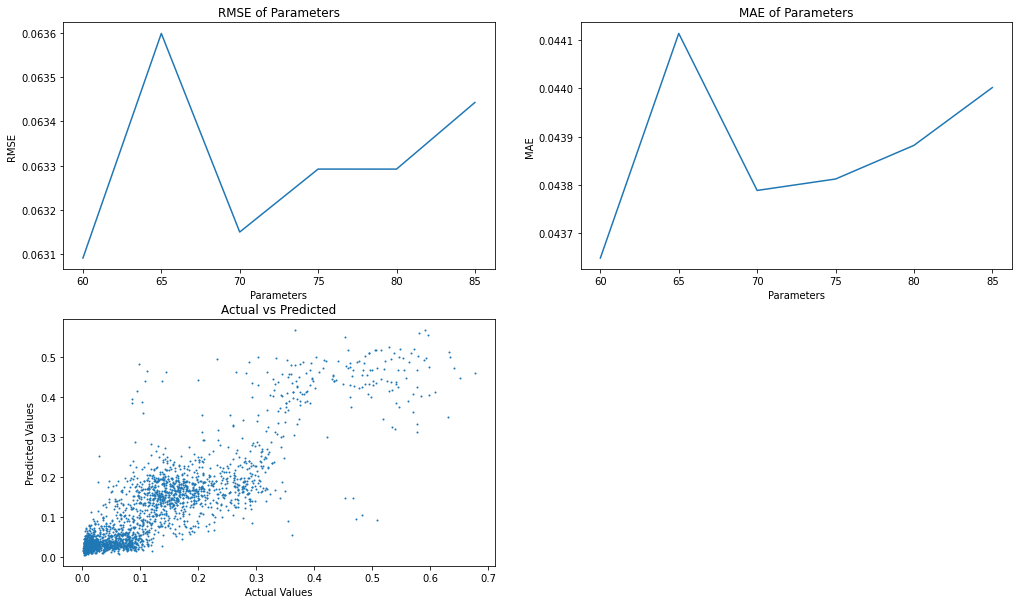

In [1105]:
random_forest([60,65,70,75,80,85], xTrain, yTrain, xTest, yTest) 

C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest.fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random_forest = RandomForestRegressor(n_estimators=i).fit(x_train,y_train)
C:\Users\ruiji\AppData\Local\Temp/ipykernel_24128/2238964677.py:8: DataConversionWarning: A column-vector y was passed when a

MAE: 0.04396710836744626
MSE: 0.004051090385623042
RMSE: 0.06364817660878466


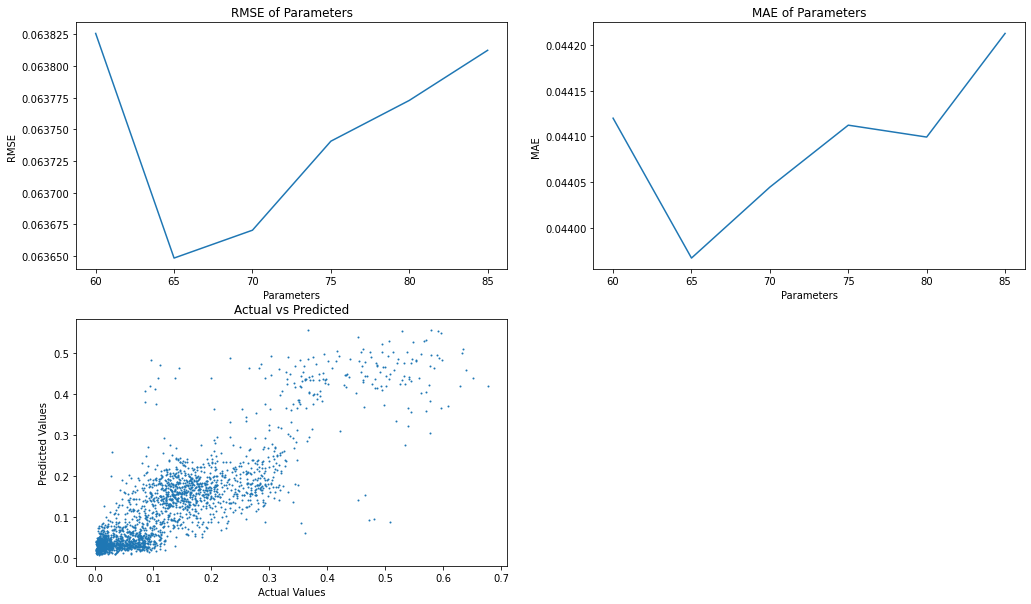

In [1113]:
random_forest([60,65,70,75,80,85], xTrain, yTrain, xTest, yTest)

5. Deep Learning

In [1114]:
def deep_learning_2(input_dim, layer1_units, layer2_units, optimizer):
    loss = 'mean_squared_error'
    metrics = [RootMeanSquaredError()]
    epochs = 15
    batch_size = 64
    layer1_activation = 'relu'
    layer2_activation = 'relu'
    output_activation = 'sigmoid'
    layer1_dropout_rate = 0.05
    layer2_dropout_rate = 0.00
    
    model3 = Sequential()
    model3.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model3.add(Dropout(layer1_dropout_rate))
    model3.add(Dense(layer2_units, activation=layer2_activation))
    model3.add(Dropout(layer2_dropout_rate))
    model3.add(Dense(1, activation=output_activation))
    model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model3

In [1090]:
optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
model_test = deep_learning_2(predictors.shape[1], 5, 5, optimizer_SGD)
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, verbose=1,shuffle=True, 
                              validation_data=(xTest,yTest))

Model: "sequential_152"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_498 (Dense)           (None, 5)                 105       
                                                                 
 dropout_315 (Dropout)       (None, 5)                 0         
                                                                 
 dense_499 (Dense)           (None, 5)                 30        
                                                                 
 dropout_316 (Dropout)       (None, 5)                 0         
                                                                 
 dense_500 (Dense)           (None, 1)                 6         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/15
237/237 [==============================] - 2s 5ms/step - loss: 0.0214 - root_mean_squared_error: 0.1463 - val_loss: 0.0151 - val_root_mean_squared_error: 0.1231
Epoch 2/15
237/237 [==============================] - 1s 4ms/step - loss: 0.0160 - root_mean_squared_error: 0.1264 - val_loss: 0.0155 - val_root_mean_squared_error: 0.1247
Epoch 3/15
237/237 [==============================] - 1s 4ms/step - loss: 0.0155 - root_mean_squared_error: 0.1247 - val_loss: 0.0147 - val_root_mean_squared_error: 0.1211
Epoch 4/15
237/237 [==============================] - 1s 4ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0143 - val_root_mean_squared_error: 0.1198
Epoch 5/15
237/237 [==============================] - 1s 4ms/step - loss: 0.0153 - root_mean_squared_error: 0.1239 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1268
Epoch 6/15
237/237 [==============================] - 1s 4ms/step - loss: 0.0153 - root_mean_squared_error: 0.1237 - val_loss: 0.0145 - val_

In [1183]:
def deep_learning_3(input_dim, layer1_units, layer2_units, layer3_units, optimizer):
    loss = 'mean_squared_error'
    metrics = [RootMeanSquaredError()]
    epochs = 15
    batch_size = 64
    layer1_activation = 'relu'
    layer2_activation = 'relu'
    layer3_activation = 'relu'
    output_activation = 'sigmoid'
    layer1_dropout_rate = 0.05
    layer2_dropout_rate = 0.02
    layer3_dropout_rate = 0.00
    
    model3 = Sequential()
    model3.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model3.add(Dropout(layer1_dropout_rate))
    model3.add(Dense(layer2_units, activation=layer2_activation))
    model3.add(Dropout(layer2_dropout_rate))
    model3.add(Dense(layer3_units, activation=layer3_activation))
    model3.add(Dropout(layer3_dropout_rate))
    model3.add(Dense(1, activation=output_activation))
    model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)
    return model3

In [1197]:
optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
model_test = deep_learning_3(Data_scaled.shape[1], 15, 15, 15, optimizer_Adam)
model_test.summary()
history_test = model_test.fit(xTrain, yTrain, epochs=epochs, batch_size=batch_size, shuffle=True, 
                              validation_data=(xTest,yTest))

Model: "sequential_206"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_701 (Dense)           (None, 15)                315       
                                                                 
 dropout_464 (Dropout)       (None, 15)                0         
                                                                 
 dense_702 (Dense)           (None, 15)                240       
                                                                 
 dropout_465 (Dropout)       (None, 15)                0         
                                                                 
 dense_703 (Dense)           (None, 15)                240       
                                                                 
 dropout_466 (Dropout)       (None, 15)                0         
                                                                 
 dense_704 (Dense)           (None, 1)              

C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


237/237 [==============================] - 1s 3ms/step - loss: 0.0077 - root_mean_squared_error: 0.0880 - val_loss: 0.0049 - val_root_mean_squared_error: 0.0702
Epoch 2/15
237/237 [==============================] - 1s 2ms/step - loss: 0.0041 - root_mean_squared_error: 0.0644 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 3/15
237/237 [==============================] - 1s 2ms/step - loss: 0.0038 - root_mean_squared_error: 0.0613 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0608
Epoch 4/15
237/237 [==============================] - 1s 3ms/step - loss: 0.0037 - root_mean_squared_error: 0.0608 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0627
Epoch 5/15
237/237 [==============================] - 1s 3ms/step - loss: 0.0037 - root_mean_squared_error: 0.0605 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0613
Epoch 6/15
237/237 [==============================] - 1s 2ms/step - loss: 0.0035 - root_mean_squared_error: 0.0593 - val_loss: 0.0038 - val_root_mean_s

In [1198]:
history_test.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

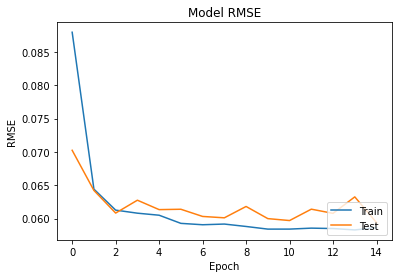

In [1199]:
plt.plot(history_test.history['root_mean_squared_error'])
plt.plot(history_test.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

72/72 [==============================] - 0s 2ms/step
0.04173524639342104
0.003526954759884986
0.059388170201522344


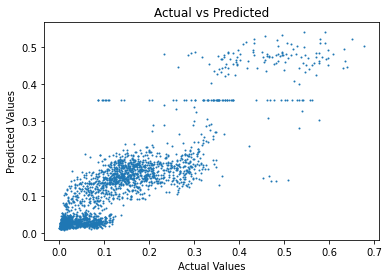

In [1207]:
prediction = model_test.predict(xTest)
print(mean_absolute_error(yTest,prediction))
print(mean_squared_error(yTest,prediction))
print(np.sqrt(mean_squared_error(yTest,prediction)))
plt.plot(yTest,prediction,'o',markersize=1)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [1138]:
optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
models = [deep_learning_2(Data_scaled.shape[1], 10, 10, optimizer_SGD),
          deep_learning_2(Data_scaled.shape[1], 5, 5, optimizer_SGD),
          deep_learning_2(Data_scaled.shape[1], 10, 5, optimizer_SGD),
          deep_learning_2(Data_scaled.shape[1], 10, 10, optimizer_Adam),
          deep_learning_2(Data_scaled.shape[1], 5, 5, optimizer_Adam),
          deep_learning_2(Data_scaled.shape[1], 10, 5, optimizer_Adam)]

C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [1143]:
models[]

In [1169]:
def deep_learning_pred(models,x_test, y_test):
    mse = []
    mae = []
    pred = []
    for i in range(len(models)):
        prediction = models[i].predict(x_test)
        pred.append(prediction)
        mse.append(mean_squared_error(y_test,prediction))
        mae.append(mean_absolute_error(y_test,prediction))
    rmse = (np.sqrt(mse))
    best_mae = np.min(mae)
    best_mse = np.min(mse)
    best_rmse = np.min(rmse)
    index = np.where(rmse == best_rmse)[0][0]
    a = np.arange(len(rmse))
    print(f"MAE: {best_mae}")
    print(f"MSE: {best_mse}")
    print(f"RMSE: {best_rmse}")  
    plt.figure(figsize=(17, 10))
    plt.subplot(2,2,1)
    plt.plot(a, rmse, label = a)
    plt.xlabel('Parameters')
    plt.ylabel('RMSE')
    plt.xticks(a)
    plt.title('RMSE of Parameters')
    plt.subplot(2,2,2)
    plt.plot(a, mae, label = a)
    plt.xlabel('Parameters')
    plt.ylabel('MAE')
    plt.title('MAE of Parameters')
    plt.xticks(a)
    plt.subplot(2,2,3)
    plt.plot(y_test,pred[index],'o',markersize=1)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted")
    plt.show()

72/72 [==============================] - 0s 1ms/step
[array([[0.47486308],
       [0.47399846],
       [0.4721494 ],
       ...,
       [0.50540566],
       [0.5061078 ],
       [0.5247394 ]], dtype=float32), array([[0.5463722 ],
       [0.54667467],
       [0.5483551 ],
       ...,
       [0.5230329 ],
       [0.52254665],
       [0.5171298 ]], dtype=float32), array([[0.45806864],
       [0.45720792],
       [0.45957774],
       ...,
       [0.51173466],
       [0.5108691 ],
       [0.4879329 ]], dtype=float32), array([[0.41136888],
       [0.41138875],
       [0.411765  ],
       ...,
       [0.43480176],
       [0.43491167],
       [0.3971667 ]], dtype=float32), array([[0.50829506],
       [0.5075814 ],
       [0.5096246 ],
       ...,
       [0.5003985 ],
       [0.5004298 ],
       [0.53144264]], dtype=float32), array([[0.5       ],
       [0.5       ],
       [0.5       ],
       ...,
       [0.5       ],
       [0.5       ],
       [0.50721735]], dtype=float32)]
MAE: 0.301170416

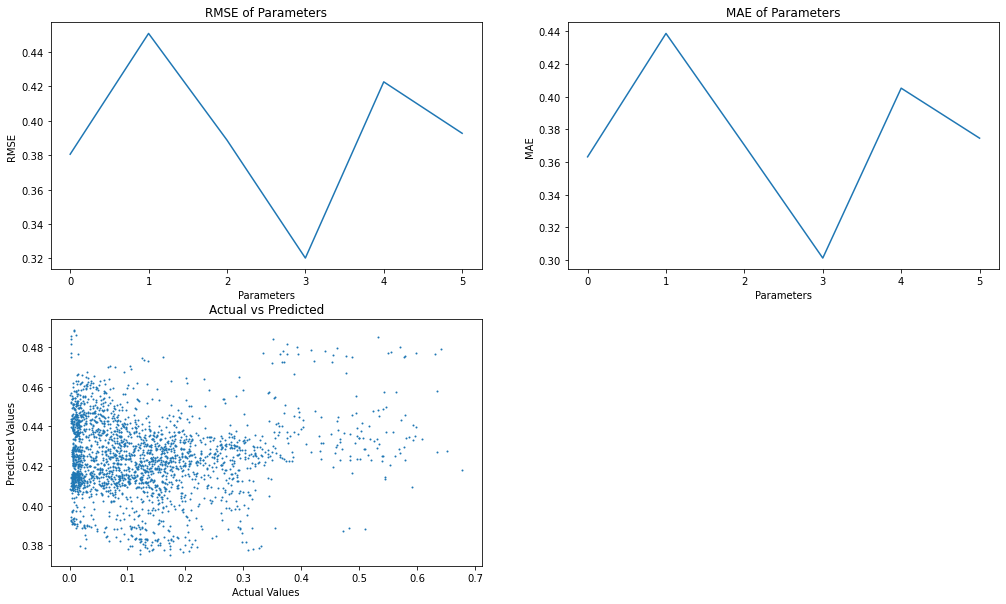

In [1165]:
deep_learning_pred(models, xTest, yTest)

In [1177]:
optimizer_SGD = SGD(lr=0.01, decay=1e-6, momentum=0.5)
optimizer_Adam = Adam(learning_rate=0.02, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0)
models = [deep_learning_3(Data_scaled.shape[1], 10, 10, 10, optimizer_SGD),
          deep_learning_3(Data_scaled.shape[1], 5, 5, 5, optimizer_SGD),
          deep_learning_3(Data_scaled.shape[1], 10, 10, 5, optimizer_SGD),
          deep_learning_3(Data_scaled.shape[1], 10, 10, 10, optimizer_Adam),
          deep_learning_3(Data_scaled.shape[1], 5, 5, 5, optimizer_Adam),
          deep_learning_3(Data_scaled.shape[1], 10, 10, 5, optimizer_Adam)]

C:\Users\ruiji\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


72/72 [==============================] - 0s 1ms/step
[array([[0.5787869 ],
       [0.57810724],
       [0.58010316],
       ...,
       [0.54396725],
       [0.54374146],
       [0.57067263]], dtype=float32), array([[0.47952548],
       [0.4784321 ],
       [0.47605875],
       ...,
       [0.49202648],
       [0.49210882],
       [0.46085438]], dtype=float32), array([[0.33990085],
       [0.34102124],
       [0.3441301 ],
       ...,
       [0.3454043 ],
       [0.34676725],
       [0.3803657 ]], dtype=float32), array([[0.45004883],
       [0.45071223],
       [0.4519075 ],
       ...,
       [0.46092522],
       [0.4605844 ],
       [0.47476912]], dtype=float32), array([[0.4899061 ],
       [0.48998693],
       [0.48247504],
       ...,
       [0.52036893],
       [0.52117676],
       [0.5275669 ]], dtype=float32), array([[0.27220798],
       [0.2754336 ],
       [0.2690118 ],
       ...,
       [0.3770858 ],
       [0.38452667],
       [0.3849054 ]], dtype=float32)]
[0.2177795294650

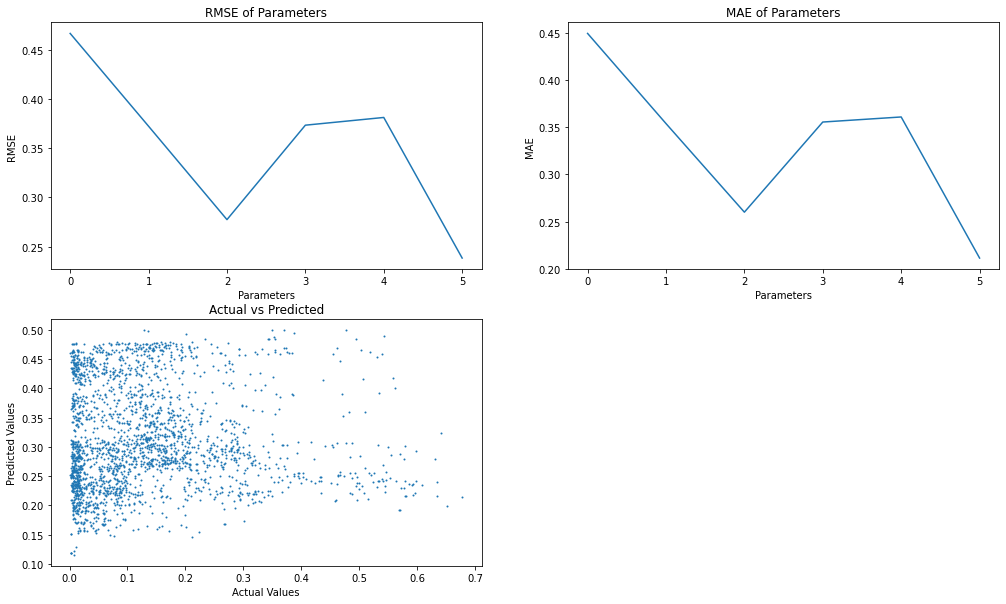

In [1178]:
deep_learning_pred(models, xTest, yTest)